In [10]:
import pickle as pk
import pandas as pd
import numpy as np
from tqdm import tqdm
from pymatgen.core.structure import Structure, Molecule
from megnet.models import MEGNetModel

In [44]:
data = pd.read_csv('data\\data.csv')
model = MEGNetModel.from_file("D:\\Projects\\projects_python\\megnet_test\\mmegnet\\megnet\\mvl_models\\qm9-2018.6.1\\U0.hdf5")

d:\Projects\projects_python\m3gnet_tests\.venv\lib\site-packages\keras\initializers\initializers_v2.py:121: UserWarning: The initializer VarianceScaling is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  f"The initializer {self.__class__.__name__} is unseeded "


In [13]:
data

,xyz,U_0,id_init,id
0,10\n\nH 1.594980000000 64.910800000000 95.0391...,-193.284402,24639,0
1,9\n\nH 63.280500000000 60.457300000000 48.2741...,-117.736584,13623,1
2,13\n\nH 26.454700000000 11.674300000000 62.229...,-269.937593,62604,2
3,24\n\nC 13.160700000000 53.348800000000 37.940...,-463.805146,20405,3
4,8\n\nH 52.589400000000 47.483500000000 63.6278...,-154.582836,3769,4
...,...,...,...,...
122376,15\n\nH 73.699800000000 16.621900000000 44.995...,-271.120573,54809,122376
122377,13\n\nH 60.124400000000 90.417300000000 11.934...,-269.898030,752,122377
122378,27\n\nH 89.053700000000 27.586700000000 26.090...,-540.602474,47418,122378
122379,10\n\nH 36.702100000000 21.812100000000 75.362...,-193.306156,27737,122379


In [15]:
y_pred = []
y_true = []
mae = 0

for i, row in tqdm(data.head(1000).iterrows(), total=data.head(1000).shape[0]):
    molecule = Molecule.from_str(row['xyz'], 'xyz')
    prediction = model.predict_structure(molecule)
    y_pred.append(prediction)
    true_value = row['U_0']
    y_true.append(true_value)
    mae += abs(true_value - prediction)

  0%|          | 0/1000 [00:00<?, ?it/s]

100%|██████████| 1000/1000 [01:01<00:00, 16.35it/s]


In [45]:
molecules = {i : Molecule.from_str(data.iloc[i]['xyz'], 'xyz') for i in tqdm(range(data.shape[0]))}

100%|██████████| 78407/78407 [00:43<00:00, 1808.65it/s]


In [36]:
mae /= 1000
mae

array([0.00196906], dtype=float32)

In [40]:
mae * data.shape[0]

array([240.9755232])

In [71]:
H4C4 = [i[1] for i in molecules.items() if i[1].formula == 'H4 C4']
H14C14 = [i[1] for i in molecules.items() if i[1].formula == 'H14 C14']

In [85]:
H14C14[3].to('xyz', 'mol1414_3.xyz')

'28\nH14 C14\nH 4.650740 21.747400 1.708660\nH 6.837010 22.896100 1.927730\nC 6.666400 21.892600 2.294730\nC 5.527220 21.209700 2.197770\nH 5.460080 20.146600 2.399920\nC 7.729970 21.131600 3.125450\nC 7.328680 22.130200 4.968010\nC 7.429940 20.752600 4.456590\nH 7.069060 22.909600 4.135760\nH 7.682870 24.516300 5.470750\nH 7.703810 19.856500 4.925110\nH 8.479540 20.683000 2.567280\nC 8.453740 24.027600 5.940580\nC 8.244900 22.576000 6.075410\nH 8.827360 21.909600 6.786530\nC 9.386050 24.294600 6.807930\nH 7.810010 20.753000 12.686000\nH 7.206350 22.463500 11.102900\nH 8.732850 19.694300 11.312200\nC 8.176130 20.538600 11.749500\nC 10.452100 24.551600 7.785640\nC 9.982550 24.050500 9.065280\nH 9.903410 24.754600 9.888760\nC 8.013300 21.763500 10.987500\nH 11.350800 25.174900 7.598320\nC 9.342920 22.377400 10.560600\nC 9.609030 22.671600 9.172120\nH 9.595220 21.823700 8.328300'

In [18]:
structure_dict = {}

for structure in molecules.items():
    if structure[1].formula in structure_dict:
        structure_dict[structure[1].formula] += 1
    else:
        structure_dict[structure[1].formula] = 1

c = 0
for structure, count in structure_dict.items():
    if count > 1:
        print(f"Структура {structure} повторяется {count} раза")
        c += 1
print(c, len(structure_dict))


Структура H5 C5 повторяется 157 раза
Структура H6 C3 повторяется 19 раза
Структура H6 C7 повторяется 59 раза
Структура H12 C12 повторяется 20 раза
Структура H4 C4 повторяется 80 раза
Структура H6 C5 повторяется 45 раза
Структура H10 C10 повторяется 9 раза
Структура H7 C7 повторяется 39 раза
Структура H5 C6 повторяется 5 раза
Структура H10 C13 повторяется 12 раза
Структура H11 C12 повторяется 10 раза
Структура H5 C4 повторяется 15 раза
Структура H8 C12 повторяется 9 раза
Структура H7 C6 повторяется 20 раза
Структура H6 C4 повторяется 6 раза
Структура H9 C8 повторяется 18 раза
Структура H9 C9 повторяется 17 раза
Структура H9 C10 повторяется 9 раза
Структура H7 C9 повторяется 34 раза
Структура H10 C12 повторяется 23 раза
Структура H9 C13 повторяется 6 раза
Структура H16 C18 повторяется 7 раза
Структура H9 C7 повторяется 4 раза
Структура H8 C10 повторяется 49 раза
Структура H12 C18 повторяется 4 раза
Структура H8 C11 повторяется 19 раза
Структура H5 C3 повторяется 11 раза
Структура H6 C6 п

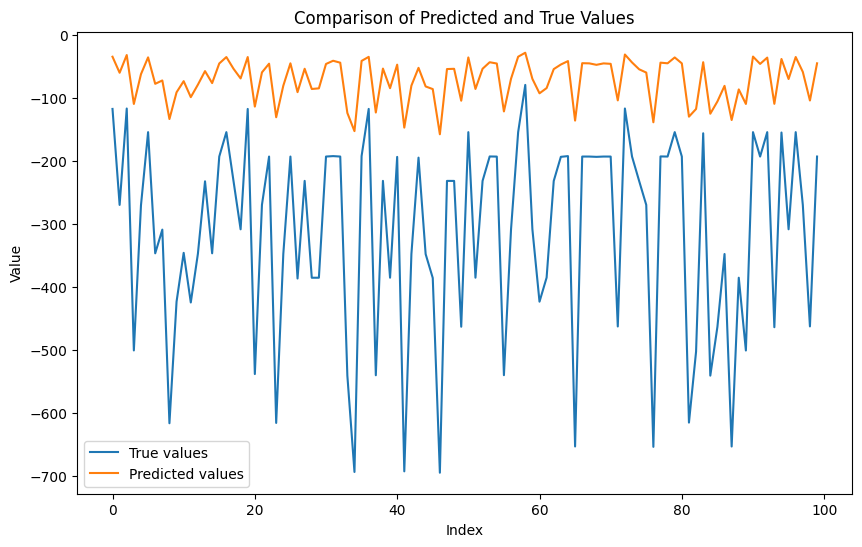

In [19]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(y_true[100:200], label='True values')
plt.plot(y_pred[100:200], label='Predicted values')
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Comparison of Predicted and True Values')
plt.legend();

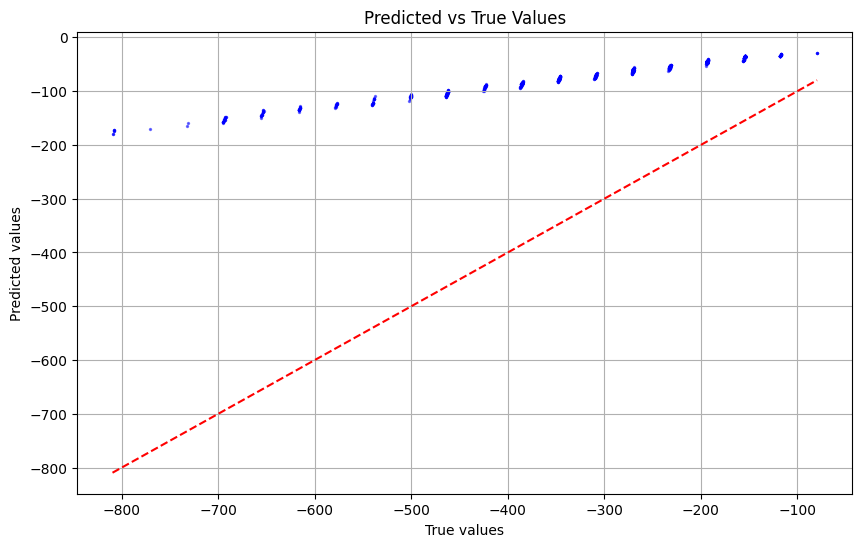

In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_true, y_pred, color='b', alpha=0.5, s=2) 
plt.plot([min(y_true), max(y_true)], [min(y_true), max(y_true)], color='r', linestyle='--')
plt.xlabel('True values')
plt.ylabel('Predicted values')
plt.title('Predicted vs True Values')
plt.grid(True)


In [46]:
c = 0
for i, mol in molecules.items():
    if not mol.is_valid():
        c += 1
c

0